In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [2]:
saved_models_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v10_TITAN/"
jax_data_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/"

In [3]:
len(os.listdir(saved_models_dir))

72

In [18]:
all_configs = []
all_configs.append({
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 5.0,
    "base_entropy_loss_coef": 2.0,
})
all_configs.append({
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 5.0,
    "base_entropy_loss_coef": 5.0,
})

In [19]:
all_predicted_exps = {}
all_predicted_exps["designed_for"] = []
all_predicted_exps["sequence"] = []
all_predicted_exps["design_model"] = []
all_predicted_exps["diversity_loss_coef"] = []
all_predicted_exps["entropy_loss_coef"] = []
all_predicted_exps["base_entropy_loss_coef"] = []

for cell in ["THP1", "Jurkat", "K562"]:
    all_predicted_exps[cell] = []

for model in sorted(os.listdir(os.path.join(jax_data_dir, "trained_predictors_final"))):
    for diff_exp_cell_ind, cell in enumerate(["THP1", "Jurkat", "K562"]):
        for config in all_configs:
            diversity_loss_coef = config["diversity_loss_coef"]
            entropy_loss_coef = config["entropy_loss_coef"]
            base_entropy_loss_coef = config["base_entropy_loss_coef"]

            experiment_id = f"{cell}_using_{model}_div_coef_{diversity_loss_coef}_ent_coef_{entropy_loss_coef}_bent_coef_{base_entropy_loss_coef}"
            
            print(experiment_id)
            
            try:
                assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
                assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            except:
                continue
            
            final_sequences_predicted_exps = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            final_sequences = np.argmax(final_sequences, axis=-1)
            final_sequences = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(final_sequences)
            
            all_predicted_exps["designed_for"].extend([cell]*len(final_sequences_predicted_exps))
            all_predicted_exps["sequence"].extend(final_sequences)
            all_predicted_exps["design_model"].extend([model]*len(final_sequences_predicted_exps))
            all_predicted_exps["diversity_loss_coef"].extend([diversity_loss_coef]*len(final_sequences_predicted_exps))
            all_predicted_exps["entropy_loss_coef"].extend([entropy_loss_coef]*len(final_sequences_predicted_exps))
            all_predicted_exps["base_entropy_loss_coef"].extend([base_entropy_loss_coef]*len(final_sequences_predicted_exps))
            
            for i, exp_cell in enumerate(["THP1", "Jurkat", "K562"]):
                all_predicted_exps[exp_cell].extend(final_sequences_predicted_exps[:, i])
                
all_predicted_exps = pd.DataFrame(all_predicted_exps)

THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_2.0
THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_5.0
Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_2.0
Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_5.0
K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_2.0
K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_5.0
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_2.0
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_5.0
Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_2.0
Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_5.0
K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_2.0
K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0_bent_coef_5.0
TH

In [ ]:
all_predicted_exps["sequence"] = all_predicted_exps.apply(lambda x: "".join(x["sequence"]), axis=1)

In [16]:
all_predicted_exps = all_predicted_exps[all_predicted_exps["base_entropy_loss_coef"] == 5]

THP1


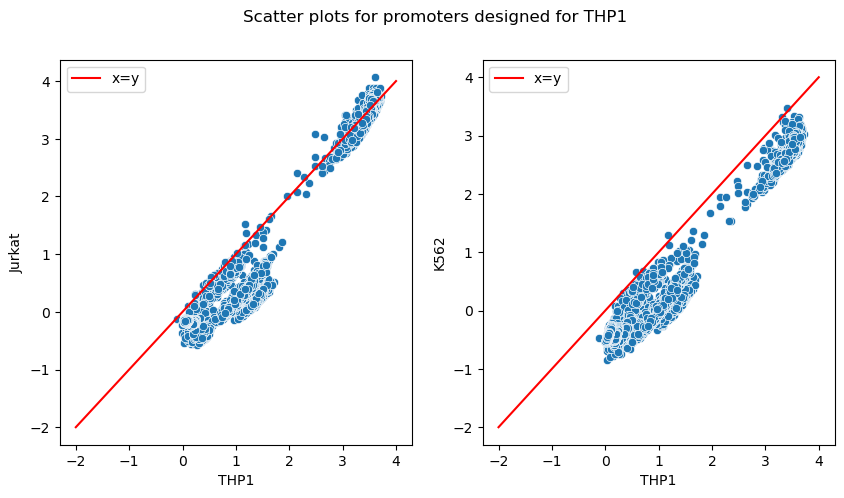

Jurkat


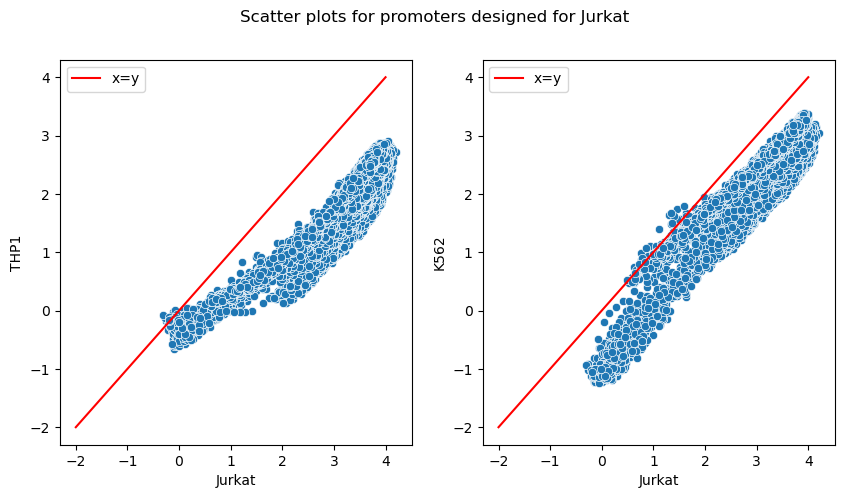

K562


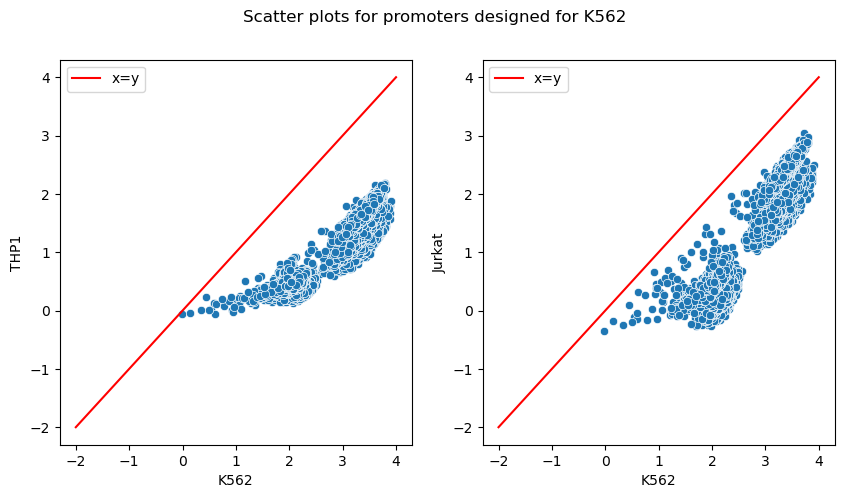

In [17]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j])
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()

THP1


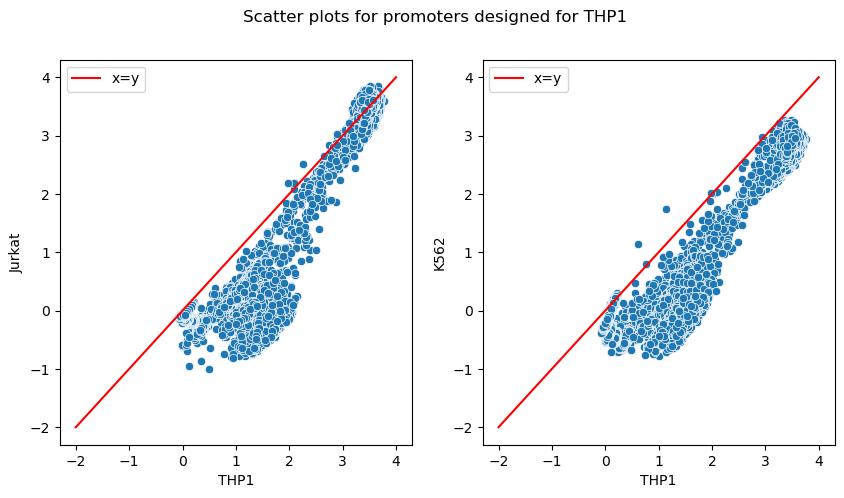

Jurkat


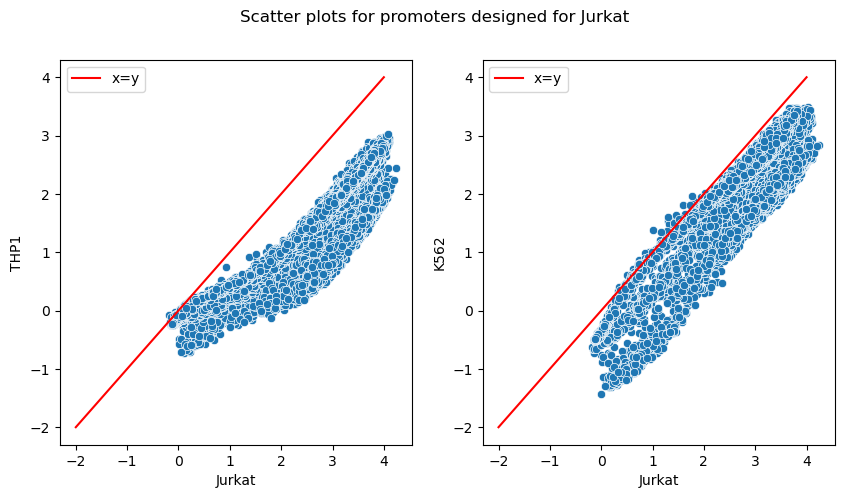

K562


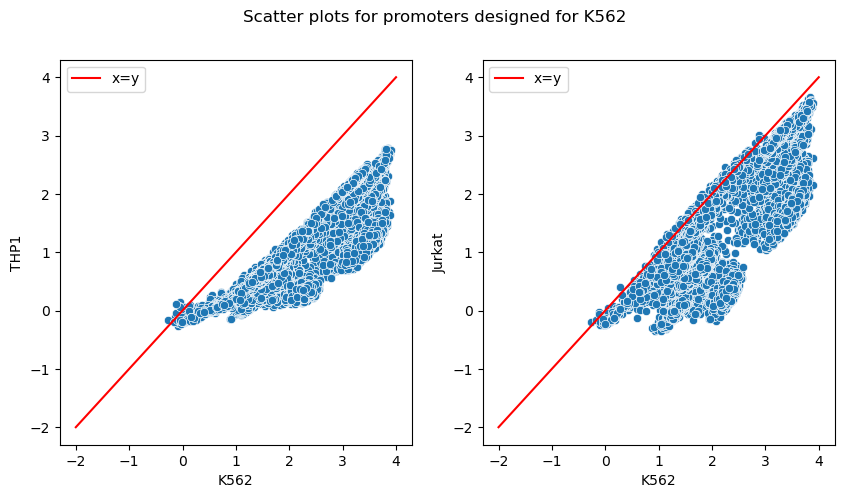

In [17]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j])
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()

THP1


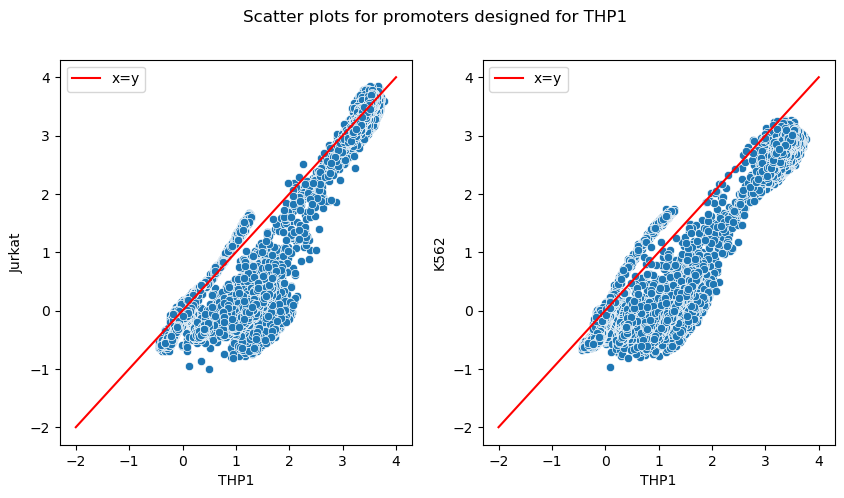

Jurkat


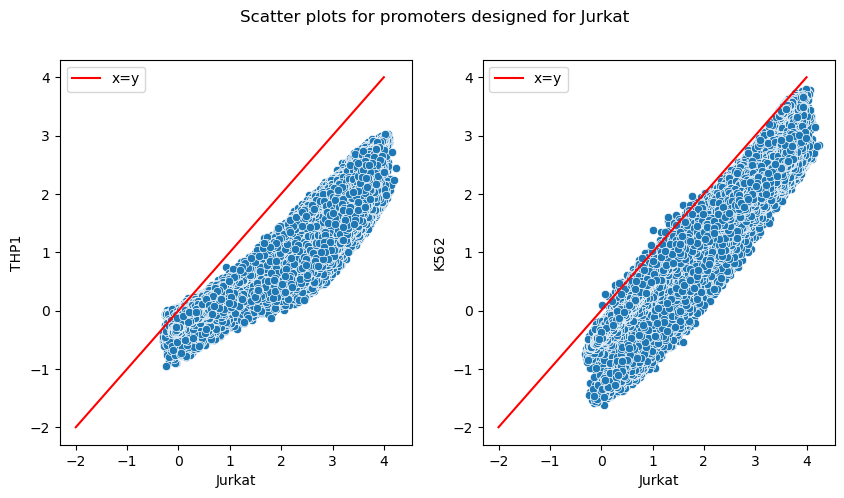

K562


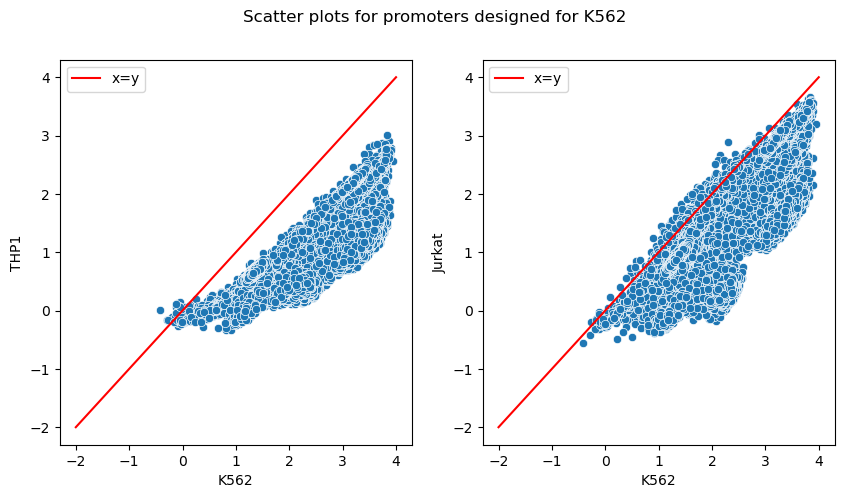

In [10]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j])
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()

In [11]:
# for cell in ["THP1", "Jurkat", "K562"]:
cell = "THP1"
print(cell)
other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]

seqs_designed_for_cell = all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True)
seqs_designed_for_cell["max_diff"] = seqs_designed_for_cell[cell] - np.max(seqs_designed_for_cell[other_cells], axis=1)
seqs_designed_for_cell = seqs_designed_for_cell.sort_values(by="max_diff", ascending=False)

THP1


In [12]:
seqs_designed_for_cell

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562,max_diff
51088,THP1,CCCTCCCTTTTTTTTCCTCCCTCCCCCCCGCTTCTGCTCTCTCTCT...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,1.496584,-0.401874,-0.410332,1.898458
50095,THP1,CCCTCCCTTTTTTTTCTCCTCCTCCTCTCCTCCTCTCTTCCTCTCC...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,1.580361,-0.366907,-0.289296,1.869657
52901,THP1,CCCTTCCTTTTTTTTCCTCCCCTTCTCCCCCCCTCCCTCCCTCCCT...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,1.491156,-0.371991,-0.397885,1.863147
52306,THP1,CCCTCCCTTTTTTTTCCTCTCCTCCTCTCCTCCTCTCCTTCTCTCT...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,1.734136,-0.186824,-0.128630,1.862766
50311,THP1,CCCTCCCTTTTTTTTCCTCCCCCCCCCCCTCCCTCCCTCCCTCCCT...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,1.541105,-0.330291,-0.318387,1.859493
...,...,...,...,...,...,...,...,...,...
48738,THP1,CCCCCGCGCCCCCGCCCCCCCCCCCCCCCCCCCCCCCCCGCCGGGG...,coms_0.03_THP1_weight_1.5.pkl,7.5,7.5,0.954666,1.168663,1.502169,-0.547503
49801,THP1,GGGGCGGGGGGGCCCCCCCCCCCCCCCCCCCGGGGGGGGGGGGGAC...,coms_0.03_THP1_weight_1.5.pkl,7.5,7.5,0.850300,1.022318,1.400536,-0.550235
47455,THP1,CCCCCCCCCCCCCCCCCCCCCGCGGGGGGGGGCCCCCCCCCCCCCC...,coms_0.03_THP1_weight_1.5.pkl,7.5,7.5,0.929233,1.143639,1.483191,-0.553958
48900,THP1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCGGGGGGGGGGGGGG...,coms_0.03_THP1_weight_1.5.pkl,7.5,7.5,0.887819,1.077886,1.443930,-0.556111


In [11]:
all_predicted_exps.to_parquet(os.path.join(jax_data_dir, "final_sequences_v10.parquet"), index=False)